In [28]:
import networkx
import math
import matplotlib.pyplot as plt
from collections import Counter
import pickle
from tqdm import tqdm

In [29]:
G1 = networkx.Graph()
G2 = networkx.Graph()
count_total_nodes = 10000
#First adding 10000 nodes to the graph
for i in range(count_total_nodes):
    G1.add_node(str(i))
    G2.add_node(str(i))


#Reading the edge list of G1 and adding the edges
fp = open("g1.edgelist.txt", "r")
text = fp.read()
list_lines = text.split("\n")
list_triples = [a.split() for a in list_lines]
for x in list_triples:
    G1.add_edge(x[0], x[1])

#Reading the edge list of G2 and adding the edges
fp = open("g2.edgelist.txt", "r")
text = fp.read()
list_lines = text.split("\n")
list_triples = [a.split() for a in list_lines]
for x in list_triples:
    G2.add_edge(x[0], x[1])

# print(G1.number_of_nodes())
# print(G1.number_of_edges())
# print(G2.number_of_nodes())
# print(G2.number_of_edges())
dict_support = {}
#Now initializing each node with the candidate it supports
for i in range(count_total_nodes):
    n = str(i)
    len_n = len(n)
    last_digit = n[len_n - 1]
    dict_temp = {}
    if last_digit == '0' or last_digit == '1' or last_digit == '2' or last_digit == '3':
        dict_temp['support'] = 'B'
    elif last_digit == '4' or last_digit == '5' or last_digit == '6' or last_digit == '7':
        dict_temp['support'] = 'A'
    else:
        dict_temp['support'] = 'U'
    dict_support[n] = dict_temp
networkx.set_node_attributes(G1, dict_support)
networkx.set_node_attributes(G2, dict_support)

In [30]:
g1_supporting_list = [G1.nodes[x]['support'] for x in G1.nodes()]
g2_supporting_list = [G2.nodes[x]['support'] for x in G2.nodes()]
print(f"For G1  {Counter(g1_supporting_list)}")
print(f"For G2  {Counter(g2_supporting_list)}")

For G1  Counter({'B': 4000, 'A': 4000, 'U': 2000})
For G2  Counter({'B': 4000, 'A': 4000, 'U': 2000})


In [31]:
#Now running the iterations for Graph 1
no_of_iterations = 7
global_alternate = 'A'
list_undecided = []
for ab in range(0, count_total_nodes):
    cn = str(ab)
    if G1.nodes[cn]['support'] == 'U':
        list_undecided.append(cn)
    
for it_cnt in range(no_of_iterations):
    for curr_node in list_undecided:
        list_neighbours = [n for n in G1.neighbors(curr_node)]
#         list_neighbours = list(G1.neighbours(curr_node))
        list_supporting = [G1.nodes[x]['support'] for x in list_neighbours]
        cntr_supporting = Counter(list_supporting)
        count_A = cntr_supporting['A']
        count_B = cntr_supporting['B']
        if count_A > count_B:
            G1.nodes[curr_node]['support'] = 'A'
        elif count_B > count_A:
            G1.nodes[curr_node]['support'] = 'B'
        else:
            G1.nodes[curr_node]['support'] = global_alternate
            if global_alternate == 'A':
                global_alternate = 'B'
            else:
                global_alternate = 'A'

list_all_supporting_1 = [G1.nodes[y]['support'] for y in G1.nodes()]
counter_all_supporting_1 = Counter(list_all_supporting_1)
cnt_A_1 = counter_all_supporting_1['A']
cnt_B_1 = counter_all_supporting_1['B']
print("For graph 1")
print(f"count of A = {cnt_A_1}")
print(f"count of B = {cnt_B_1}")
if cnt_A_1 > cnt_B_1:
    diff = cnt_A_1 - cnt_B_1
    print(f"In Graph 1 contestant A wins by {diff} votes")
else:
    diff = cnt_B_1 - cnt_A_1
    print(f"In Graph 1 contestant B wins by {diff} votes")
    
#Now running the iterations for Graph 2
global_alternate = 'A'
list_undecided = []
for ab in range(0, count_total_nodes):
    cn = str(ab)
    if G2.nodes[cn]['support'] == 'U':
        list_undecided.append(cn)
    
for it_cnt in range(no_of_iterations):
    for curr_node in list_undecided:
        list_neighbours = [n for n in G2.neighbors(curr_node)]
#             list_neighbours = list(G1.neighbours(curr_node))
        list_supporting = [G2.nodes[x]['support'] for x in list_neighbours]
        cntr_supporting = Counter(list_supporting)
        count_A = cntr_supporting['A']
        count_B = cntr_supporting['B']
        if count_A > count_B:
            G2.nodes[curr_node]['support'] = 'A'
        elif count_B > count_A:
            G2.nodes[curr_node]['support'] = 'B'
        else:
            G2.nodes[curr_node]['support'] = global_alternate
            if global_alternate == 'A':
                global_alternate = 'B'
            else:
                global_alternate = 'A'

list_all_supporting_2 = [G2.nodes[y]['support'] for y in G2.nodes()]
counter_all_supporting_2 = Counter(list_all_supporting_2)
cnt_A_2 = counter_all_supporting_2['A']
cnt_B_2 = counter_all_supporting_2['B']
print("For graph 2")
print(f"count of A = {cnt_A_2}")
print(f"count of B = {cnt_B_2}")
if cnt_A_2 > cnt_B_2:
    diff = cnt_A_2 - cnt_B_2
    print(f"In Graph 2 contestant A wins by {diff} votes")
else:
    diff = cnt_B_2 - cnt_A_2
    print(f"In Graph 2 contestant B wins by {diff} votes")

For graph 1
count of A = 4937
count of B = 5063
In Graph 1 contestant B wins by 126 votes
For graph 2
count of A = 4913
count of B = 5087
In Graph 2 contestant B wins by 174 votes


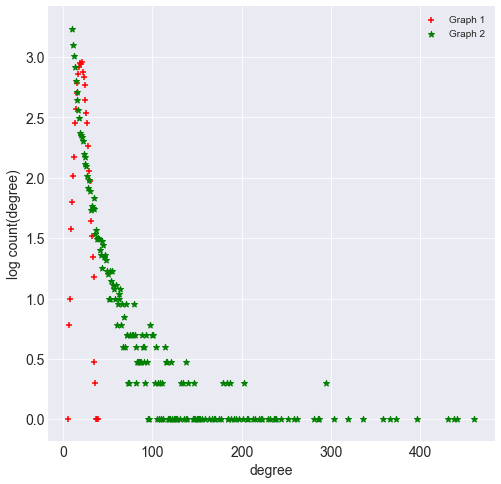

In [32]:
import math
list_degrees_1 = [d for n, d in G1.degree()]
list_degrees_2 = [d for n, d in G2.degree()]

dict_degrees_1 = Counter(list_degrees_1)
x_cord_1 = [k for k in dict_degrees_1]
y_cord_1 = [math.log10(dict_degrees_1[k]) for k in dict_degrees_1]
dict_degrees_2 = Counter(list_degrees_2)
x_cord_2 = [l for l in dict_degrees_2]
y_cord_2 = [math.log10(dict_degrees_2[l]) for l in dict_degrees_2]

plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (8, 8))
plt.scatter(x_cord_1, y_cord_1, label= "Graph 1", color= "red",  marker= "+", s=40) 

plt.scatter(x_cord_2, y_cord_2, label= "Graph 2", color= "green",  marker= "*", s=40) 
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('degree', fontsize = 14)
plt.ylabel('log count(degree)', fontsize = 14)
plt.legend() 
plt.show()

In [33]:
list_deg_1 = []
list_deg_2 = []
for t in range(3000, 3100):
    nd = str(t)
    list_deg_1.append(G1.degree[nd])
    list_deg_2.append(G2.degree[nd])

In [34]:
import statistics
avg_deg_1 = statistics.mean(list_deg_1)
avg_deg_2 = statistics.mean(list_deg_2)

In [35]:
print(f"Average degree of nodes 3000-3099 in Graph 1 = {avg_deg_1}")
print(f"Average degree of nodes 3000-3099 in Graph 2 = {avg_deg_2}")

Average degree of nodes 3000-3099 in Graph 1 = 20.19
Average degree of nodes 3000-3099 in Graph 2 = 18.27
